# Task 0 - Normalization Constants
Write the function `def normalization_constants(X):` that calculates the normalization (standardization) constants of a matrix:
- `X` is the numpy.ndarray of shape `(m, nx)` to normalize
    - `m` is the number of data points
    - `nx` is the number of features
- Returns: the mean and standard deviation of each feature, respectively

In [9]:
import numpy as np


def normalization_constants(X):
    mu = np.mean(X, axis=0)
    s = np.std(X, axis=0)
    return mu, s

In [10]:
import numpy as np

if __name__ == '__main__':
    np.random.seed(0)
    a = np.random.normal(0, 2, size=(100, 1))
    b = np.random.normal(2, 1, size=(100, 1))
    c = np.random.normal(-3, 10, size=(100, 1))
    X = np.concatenate((a, b, c), axis=1)
    m, s = normalization_constants(X)
    print(m)
    print(s)

[ 0.11961603  2.08201297 -3.59232261]
[2.01576449 1.034667   9.52002619]


# Task 1 - Normalize
Write the function `def normalize(X, m, s):` that normalizes (standardizes) a matrix:
- `X` is the `numpy.ndarray` of shape `(d, nx)` to normalize
    - `d` is the number of data points
    - `nx` is the number of features
- `m` is a `numpy.ndarray` of shape `(nx,)` that contains the mean of all features of `X`
- `s` is a `numpy.ndarray` of shape `(nx,)` that contains the standard deviation of all features of `X`
- Returns: The normalized `X` matrix

In [15]:
import numpy as np


def normalize(X, m, s):
    Z = (X - m) / s
    return Z

In [16]:
import numpy as np

if __name__ == '__main__':
    np.random.seed(0)
    a = np.random.normal(0, 2, size=(100, 1))
    b = np.random.normal(2, 1, size=(100, 1))
    c = np.random.normal(-3, 10, size=(100, 1))
    X = np.concatenate((a, b, c), axis=1)
    m, s = normalization_constants(X)
    print(X[:10])
    X = normalize(X, m, s)
    print(X[:10])
    m, s = normalization_constants(X)
    print(m)
    print(s)

[[  3.52810469   3.8831507   -6.69181838]
 [  0.80031442   0.65224094  -5.39379178]
 [  1.95747597   0.729515     7.99659596]
 [  4.4817864    2.96939671   3.55263731]
 [  3.73511598   0.82687659   3.40131526]
 [ -1.95455576   3.94362119 -19.16956044]
 [  1.90017684   1.58638102  -3.24326124]
 [ -0.30271442   1.25254519 -10.38030909]
 [ -0.2064377    3.92294203  -0.20075401]
 [  0.821197     3.48051479  -3.9815039 ]]
[[ 1.69091612  1.74078977 -0.32557639]
 [ 0.33768746 -1.38186686 -0.18922943]
 [ 0.91174338 -1.3071819   1.21732003]
 [ 2.16402779  0.85765153  0.75051893]
 [ 1.79361228 -1.21308245  0.73462381]
 [-1.02897526  1.79923417 -1.63625998]
 [ 0.88331787 -0.47902557  0.03666601]
 [-0.20951378 -0.80167608 -0.71302183]
 [-0.1617519   1.77924787  0.35625623]
 [ 0.34804709  1.35164437 -0.04088028]]
[ 2.44249065e-17 -4.99600361e-16  1.46549439e-16]
[1. 1. 1.]


# Task 2 - Shuffle Data
Write the function `def shuffle_data(X, Y):` that shuffles the data points in two matrices the same way:
- `X` is the first `numpy.ndarray` of shape `(m, nx)` to shuffle
    - `m` is the number of data points
    - `nx` is the number of features in `X`
- `Y` is the second `numpy.ndarray` of shape `(m, ny)` to shuffle
    - `m` is the same number of data points as in `X`
    - `ny` is the number of features in `Y`
- Returns: the shuffled `X` and `Y` matrices

Hint: you should use `numpy.random.permutation`

In [25]:
import numpy as np


def shuffle_data(X, Y):
    m = X.shape[0]
    rand = np.random.permutation(m)
    return X[rand], Y[rand]


In [26]:
import numpy as np

if __name__ == '__main__':
    X = np.array([[1, 2],
                [3, 4],
                [5, 6],
                [7, 8], 
                [9, 10]])
    Y = np.array([[11, 12],
                [13, 14],
                [15, 16],
                [17, 18],
                [19, 20]])

    np.random.seed(0)
    X_shuffled, Y_shuffled = shuffle_data(X, Y)

    print(X_shuffled)
    print(Y_shuffled)

[[ 5  6]
 [ 1  2]
 [ 3  4]
 [ 7  8]
 [ 9 10]]
[[15 16]
 [11 12]
 [13 14]
 [17 18]
 [19 20]]


# Task - Mini-Batch
Write the function `def train_mini_batch(X_train, Y_train, X_valid, Y_valid, batch_size=32, epochs=5, load_path="/tmp/model.ckpt", save_path="/tmp/model.ckpt"):` that trains a loaded neural network model using mini-batch gradient descent:

* `X_train` is a `numpy.ndarray` of shape `(m, 784)` containing the training data
  * `m` is the number of data points
  * `784` is the number of input features
* `Y_train` is a one-hot `numpy.ndarray` of shape `(m, 10)` containing the training labels
  * `10` is the number of classes the model should classify
* `X_valid` is a `numpy.ndarray` of shape `(m, 784)` containing the validation data
* `Y_valid` is a one-hot `numpy.ndarray` of shape `(m, 10)` containing the validation labels
* `batch_size` is the number of data points in a batch
* `epochs` is the number of times the training should pass through the whole dataset
* `load_path` is the path from which to load the model
* `save_path` is the path to where the model should be saved after training
* Returns: the path where the model was saved
* Your training function should allow for a smaller final batch (a.k.a. use the entire training set)
1. import meta graph and restore session
2. Get the following tensors and ops from the collection restored
  * `x` is a placeholder for the input data
  * `y` is a placeholder for the labels
  * `accuracy` is an op to calculate the accuracy of the model
  * `loss` is an op to calculate the cost of the model
  * `train_op` is an op to perform one pass of gradient descent on the model
3. loop over epochs:
  * shuffle data
  * loop over the batches:
    * get `X_batch` and `Y_batch` from data
    * train your model
4. Save session
* You should use `shuffle_data = __import__('2-shuffle_data').shuffle_data`
* Before the first epoch and after every subsequent epoch, the following should be printed:
  * `After {epoch} epochs:` where `{epoch}` is the current epoch
  * `\tTraining Cost: {train_cost}` where `{train_cost}` is the cost of the model on the entire training set
  * `\tTraining Accuracy: {train_accuracy}` where `{train_accuracy}` is the accuracy of the model on the entire training set
  * `\tValidation Cost: {valid_cost}` where `{valid_cost}` is the cost of the model on the entire validation set
  * `\tValidation Accuracy: {valid_accuracy}` where `{valid_accuracy}` is the accuracy of the model on the entire validation set
* After every 100 steps gradient descent within an epoch, the following should be printed:
  * `\tStep {step_number}:` where `{step_number}` is the number of times gradient descent has been run in the current epoch
  * `\t\tCost: {step_cost}` where `{step_cost}` is the cost of the model on the current mini-batch
  * `\t\tAccuracy: {step_accuracy}` where `{step_accuracy}` is the accuracy of the model on the current mini-batch
  * Advice: the function `range` can help you to handle this loop inside your dataset by using `batch_size` as step value

In [36]:
import numpy as np
import tensorflow.compat.v1 as tf


def train_mini_batch(X_train, Y_train, X_valid, Y_valid, batch_size=32,
                     epochs=5, load_path="/tmp/model.ckpt", save_path="/tmp/model.ckpt"):
    with tf.Session() as sess:
#         Primero se importa la gráfica
        saved = tf.train.import_meta_graph('{}.meta'.format(load_path))
#         Luego se restaura la sesión
        saved.restore(sess, load_path)
#         Se estan cargando los placeholders
        x = tf.get_collection('x')[0]
        y = tf.get_collection('y')[0]
        accuracy = tf.get_collection('accuracy')[0]
        loss = tf.get_collection('loss')[0]
        train_op = tf.get_collection('train_op')[0]
#         Definiendo shuffle
        m = X_train.shape[0]
        if m % batch_size == 0:
            min_batch = m / batch_size
        else:
            min_batch = int(m / batch_size) + 1
#         Generando epochs y mensaje
        for epoch in range(epochs + 1):
#             Se agrega un epoch para imprimir el resultado final
            dt = {x: X_train, y: Y_train}
            dv = {x: X_valid, y: Y_valid}
            train_cost = sess.run(loss, feed_dict=dt)
            train_accuracy = sess.run(accuracy, feed_dict=dt)
            valid_cost = sess.run(loss, feed_dict=dv)
            valid_accuracy = sess.run(accuracy, feed_dict=dv)
            print('After {} epochs:'.format(epoch))
            print('\tTraining Cost: {}'.format(train_cost))
            print('\tTraining Accuracy: {}'.format(train_accuracy))
            print('\tValidation Cost: {}'.format(valid_cost))
            print('\tValidation Accuracy: {}'.format(valid_accuracy))
            if epoch < epochs:
                Xsh, Ysh = shuffle_data(X_train, Y_train)
                for i in range(min_batch):
                    a_0 = i * batch_size
                    a_1 = a_0 + batch_size
                    if m > a_1:
                        a_1 = m
                    X_mb = Xsh[a_0:a_1]
                    Y_mb = Ysh[a_0:a_1]
                    dt = {x: X_mb, y: Y_mb}
                    train = sess.run(train_op, feed_dict=dt)
                    if (i + 1) % 100 == 0 and i != 0:
                        step_cost = sess.run(loss, feed_dict=dt)
                        step_accuracy = sess.run(accuracy, feed_dict=dt)
                        print('\tStep {}:'.format(i + 1))
                        print('\t\tCost: {}'.format(step_cost))
                        print('\t\tAccuracy: {}'.format(step_accuracy))
        return saved.save(sess, save_path)

In [37]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    oh = np.zeros((Y.shape[0], classes))
    oh[np.arange(Y.shape[0]), Y] = 1
    return oh

if __name__ == '__main__':
    lib= np.load('../data/MNIST.npz')
    X_train_3D = lib['X_train']
    Y_train = lib['Y_train']
    X_train = X_train_3D.reshape((X_train_3D.shape[0], -1))
    Y_train_oh = one_hot(Y_train, 10)
    X_valid_3D = lib['X_valid']
    Y_valid = lib['Y_valid']
    X_valid = X_valid_3D.reshape((X_valid_3D.shape[0], -1))
    Y_valid_oh = one_hot(Y_valid, 10)

    layer_sizes = [256, 256, 10]
    activations = [tf.nn.tanh, tf.nn.tanh, None]
    alpha = 0.01
    iterations = 5000

    np.random.seed(0)
    save_path = train_mini_batch(X_train, Y_train_oh, X_valid, Y_valid_oh,
                                 epochs=10, load_path='./graph.ckpt',
                                 save_path='./model.ckpt')
    print('Model saved in path: {}'.format(save_path))

INFO:tensorflow:Restoring parameters from ./graph.ckpt
After 0 epochs:
	Training Cost: 2.8232288360595703
	Training Accuracy: 0.08726000040769577
	Validation Cost: 2.810532331466675
	Validation Accuracy: 0.08640000224113464
	Step 100:
		Cost: 0.8404947519302368
		Accuracy: 0.7824564576148987
	Step 200:
		Cost: 0.6099883317947388
		Accuracy: 0.8393381237983704
	Step 300:
		Cost: 0.5182862281799316
		Accuracy: 0.8596903681755066
	Step 400:
		Cost: 0.46630072593688965
		Accuracy: 0.8722872734069824
	Step 500:
		Cost: 0.43379902839660645
		Accuracy: 0.8808474540710449
	Step 600:
		Cost: 0.4101600646972656
		Accuracy: 0.8861247897148132
	Step 700:
		Cost: 0.39346444606781006
		Accuracy: 0.8900550007820129
	Step 800:
		Cost: 0.3755631446838379
		Accuracy: 0.8942370414733887
	Step 900:
		Cost: 0.36094605922698975
		Accuracy: 0.8985022902488708
	Step 1000:
		Cost: 0.3509767949581146
		Accuracy: 0.9002329111099243
	Step 1100:
		Cost: 0.3412742018699646
		Accuracy: 0.9029800295829773
	Step 1200:

	Step 1100:
		Cost: 0.15030783414840698
		Accuracy: 0.957591712474823
	Step 1200:
		Cost: 0.1483376920223236
		Accuracy: 0.9577028751373291
	Step 1300:
		Cost: 0.1429135948419571
		Accuracy: 0.9605075716972351
	Step 1400:
		Cost: 0.1362231820821762
		Accuracy: 0.9644495248794556
	Step 1500:
		Cost: 0.13032200932502747
		Accuracy: 0.9635826945304871
After 7 epochs:
	Training Cost: 0.15549229085445404
	Training Accuracy: 0.956279993057251
	Validation Cost: 0.15961115062236786
	Validation Accuracy: 0.9559999704360962
	Step 100:
		Cost: 0.15175627171993256
		Accuracy: 0.9568670988082886
	Step 200:
		Cost: 0.1508820503950119
		Accuracy: 0.9573707580566406
	Step 300:
		Cost: 0.1486654281616211
		Accuracy: 0.9583003520965576
	Step 400:
		Cost: 0.1474107950925827
		Accuracy: 0.9585303068161011
	Step 500:
		Cost: 0.14803391695022583
		Accuracy: 0.9587153196334839
	Step 600:
		Cost: 0.1466633379459381
		Accuracy: 0.9593279957771301
	Step 700:
		Cost: 0.14747026562690735
		Accuracy: 0.95888823270

# Task - 4
Write the function `def moving_average(data, beta):` that calculates the weighted moving average of a data set:

* `data` is the list of data to calculate the moving average of
* `beta` is the weight used for the moving average
* Your moving average calculation should use bias correction
* Returns: a list containing the moving averages of `data`

In [49]:
import numpy as np


def moving_average(data, beta):
    vt = 0
    retorno = []
    for i in range(len(data)):
        vt = beta * vt + (1 - beta) * data[i]
        correct = 1 / (1 - (beta ** (i + 1)))
        v = vt * correct
        retorno.append(v)
    return retorno

[72.0, 75.15789473684211, 73.62361623616238, 71.98836871183484, 70.52604332006545, 70.20035470453027, 71.88706986789997, 73.13597603396988, 71.80782582850702, 70.60905915023126, 69.93737009120935, 71.0609712312634, 70.11422355031073, 69.32143707981285, 70.79208718739721, 70.81760741911773, 70.59946700377962, 69.94063282807862, 70.17873340222755, 69.47534437750306, 68.41139351151023, 67.58929643210207, 66.97601174673005, 66.86995043877324, 67.42263231561797, 67.91198666959514, 67.8151574064495, 67.72913996327617, 67.65262186609462, 67.68889744321646, 68.4490074480647]


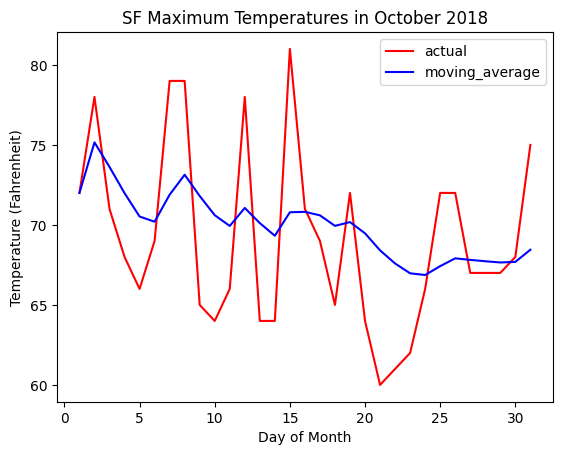

In [50]:
import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
        data = [72, 78, 71, 68, 66, 69, 79, 79, 65, 64, 66, 78, 64, 64, 81, 71, 69,
                65, 72, 64, 60, 61, 62, 66, 72, 72, 67, 67, 67, 68, 75]
        days = list(range(1, len(data) + 1))
        m_avg = moving_average(data, 0.9)
        print(m_avg)
        plt.plot(days, data, 'r', days, m_avg, 'b')
        plt.xlabel('Day of Month')
        plt.ylabel('Temperature (Fahrenheit)')
        plt.title('SF Maximum Temperatures in October 2018')
        plt.legend(['actual', 'moving_average'])
        plt.show()